# Lab 6: Exploring Unfairness and Biased Data ⚖️

## Learning Objectives
 
* Data Exploration
* Gaining Awareness of Bias in Data 
* Understanding and Applying Linear Classification
* Practice ML Workflow: Training, Testing, and Evaluation
* Exploring Ways to Mitigate Unfairness in ML Algorithms

## Outline

### Part I: The Data

1. [Bias in Data](#1.-Bias-in-Data)
    1. [An Example](#An-Example)
    2. [Sources of Bias in Data](#Sources-of-Bias-in-Data)
    3. [Our Scenario: Loan Approval](#Our-Scenario:-Loan-Approval)
2. [Exploring Loan Approval Data](#2.-Exploring-Loan-Approval-Data)
    1. [Acquiring the Data](#Acquiring-the-Data)
    2. [Making some Adjustments](#Making-some-Adjustments)
    3. [Visualizing the Data Set](#Visualizing-the-Data-Set)
    4. [Describe your Findings](#Describe-your-Findings)
3.  [Data Preprocessing](#3.-Data-Preprocessing)
    1. [Encoding the Class Labels](#Encoding-the-Class-Labels)
    2. [Encoding the Cateogrical Features](#Encoding-the-Cateogrical-Features)
    3. [Combining the Results](#Combining-the-Results)
    
### Part II: The Model
    
4. [Building a Model](#4.-Building-a-Model)
    1. [Establishing a Baseline](#Establishing-a-Baseline)
    2. [Taking a Closer Look!](#Taking-a-Closer-Look!)
5. [Towards a Fair Algorithm](#5.-Towards-a-Fair-Algorithm)
    1. [Defining Fairness](#Defining-Fairness)
    2. [Idea 1: Pre-processing](#Idea-1:-Pre-processing)
    3. [Idea 2: Changing the Model](#Idea-2:-Changing-the-Model)
    4. [Idea 3: Post-processing](#Idea-3:-Post-processing)
6. [Becoming Data and Fairness Aware](#6.-Becoming-Data-and-Fairness-Aware)
    1. [Takeaways](#Takeaways)
    2. [What comes next?](#What-comes-next?)

# Part I: The Data

## 1. Bias in Data

### An Example
It is natural to assume that a model built from "real-world" data will inherently represent the world-at-large. We often take the data that we have for granted, especially when we are first getting started with Data Science. However, if we do not pay attention to what our data look like, how they were collected, and what features they contain, we may unknowingly create models that propagate cultural biases and unfairnesses.

> _So, what does it mean for a model to be unfair?_

Let's take a look at an example. In 2014, Amazon began building programs that could automate the hiring process for engineers. They wanted a machine to be able to pick out the top resumes from the thousands they receive every year. This was reported in this [Reuters article](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G) and has since been discussed by other sources.

<img src="utility/images/undraw_hire_te5y.png" alt="hire" style="width: 600px;"/>

They trained their model on all of the resumes that they had, hoping that the model would be able to identify trends in keyword frequency within those applications. However, as they began to deploy their model, it became increasingly apparent that the model was discriminating against women. When engineers investigated why this was the case, they found that the data they trained the model with, the resumes, had mostly come from men. The model had learned to prefer resumes that didn't contain the word "women's" (as in “women’s chess club captain”) because that word wasn't frequently seen during its training. Although gender was not explicitly a feature of the dataset, it was still present in the dataset, encoded within the experiences that applicants reported.

### Sources of Bias in Data

Let's watch a short introductory [video](https://youtu.be/59bMh59JQDo) to learn about different types of bias. 


The data in the Amazon example above seems to exhibit _latent bias_, since historically the applicants happened to be mostly men. Additionally, this process of analyzing applications also influcnes the hiring process, which then will infulence the new data/feedback being generated by the hired applicants and this leads to _interaction bias_.

Amazon's case serves as a real-world example to remind us that we must be careful of our data and models, even more so today as data becomes cheaper to collect.

### Our Scenario: Loan Approval

Imagine that you are a data scientist at the Bank of Learning (BoL) and that one of your company's primary business areas is in lending money. The current loan approval process, that has been in place since the founding of the bank, has always relied on manual review of applications -- a process that is tedious and doesn't scale well in the modern age. BoL wants to expand their business, but this archaeic system is holding them back.

Thinking about how to approach this problem, you immediately think of using the bank's **past loan approval records** to build a model that can learn which applications to **approve** and which to **reject**.

<img src="utility/images/undraw_accept_request_vdsd.png" alt="approval" style="width: 600px;"/>

**Write-up!** Which type of bias(es) do think are likley to be reflected in the BoL's loan approval data and why? Discuss with your neighbors. 

**Your response here:** Latent bias due to historical biases against women/minorities. 


## 2. Exploring Loan Approval Data

Now, it's time to look at our data. As you work through this section, try to look for hints of bias in the data set.


### Acquiring the Data
Before we begin, let's make sure that we have the data. The cell below checks if you have the `loan-payments.csv` file in the `utility/data` directory.


In [1]:
from os.path import exists


data_dir = 'utility/data'

assert exists(f'{data_dir}/loan-payments.csv'), 'Loan data file is missing.'

Next, let's load our data. In the cell below, we read our [CSV][1] file into a [Pandas][2] [`DataFrame`][3] called `data`.



[1]: https://en.wikipedia.org/wiki/Comma-separated_values
[2]: https://pandas.pydata.org/
[3]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [2]:
import pandas as pd

data = pd.read_csv(f'{data_dir}/loan-payments.csv')

Let's take a look at what we have.

In [5]:
data.head()

,ID,Status,Principal,Terms,Effective Date,Due Date,Date Closed,Risk Score,Age,Education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0.0,50,Bachelors,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bachelors,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0.0,27,College,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0.0,28,College,female


**Write-up!** How many examples are in our data set? How many features does it have?

**Your response here:** 500 examples with 11 features each.


**Write-up!** With your neighbor, come up with a description of what you think each feature is and what type of feature each one is. Which one should be our target variable? Which ones do you think will be useful for our model?

**Your response here:** The target variable should be risk score, everything except gender/date/ID.


> **CAUTION:** do not remove any of the variables you identified above unless instructed. There are many differnt reasonable combinations on features and target variables to use (and your choice most likley makes sense). To make sure we are all looking at thes ame things, we will make the decision about what to use as target (it will be `Status`) and which features to investigate as predictors for you below. 

### Making Some Adjustments

First, let's drop the columns in `data` that contain features that we are not interested in. Since `ID`s are not informative for predicting new loans, we can ignore them. Additionally, from our communications with the client lender, we know that `Effective Date`, `Due Date`, and `Date Closed` have all been factored into the `Risk Score`.

**Try this!** In the following cell, create a list containing the names of the features that you would like to **exclude** from the data set and store it in `not_interested`.

> **Hint**: For the sake of this lab you can drop these columns. However, always be careful when doing this and always include a doscumentation listing such data alternation steps with  any derived data (that you store and reuse (or provide for reuse) outside of the initial noebook) to prevent loss of information. 

In [6]:
# your code here 
not_interested = ['ID', 'Effective Date', 'Due Date', 'Date Closed']

data = data.drop(not_interested, axis=1)

Let's see our new data set.

In [7]:
data.head()

,Status,Principal,Terms,Risk Score,Age,Education,Gender
0,PAIDOFF,1000,30,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bachelors,female
2,PAIDOFF,1000,30,0.0,33,Bachelors,female
3,PAIDOFF,1000,15,0.0,27,College,male
4,PAIDOFF,1000,30,0.0,28,College,female


### Visualizing the Data Set

Now that we have narrowed down the features we want to use, let's visualize them to help us with our EDA.

#### Individual Variables: Categorical Variables

Let's start with the categorical features. Identify those from the table shown above and visualize each of them using an appropriate plot. 

**Try this!** Let's create one figure with subplots for each _categorical variable_. 
> **Hint**: We recommend 
using `plt.subplot('abc')` to create a compact way of organizing the plots in one figure. `a` is the number of rows, `b` is the number of columns, and `c` is the place for the current sub-figure. E.g. `plt.subplot('221')` let's you put a plot in the upper-left cell of a 2x2 plot matrix.  

> **Rule-of-Thumb**: Three subplots look good in one row. Four subplots look best in a 2x2 grid, etc. 

C:\Users\Hyrul\miniconda3\envs\cse217a\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Hyrul\miniconda3\envs\cse217a\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
C:\Users\Hyrul\miniconda3\envs\cse217a\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

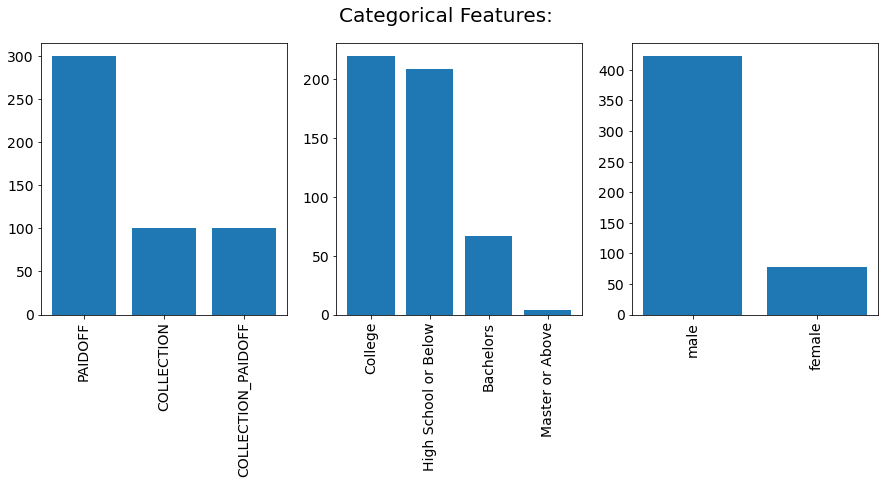

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from utility.util import configure_plots

configure_plots()


plt.figure(figsize=(15, 5))        
plt.suptitle("Categorical Features:", fontsize=20)

plt.subplot('131')
plt.bar(data['Status'].value_counts().keys(), data['Status'].value_counts().values)
plt.xticks(rotation=90)
plt.subplot('132')
plt.bar(data['Education'].value_counts().keys(), data['Education'].value_counts().values)
plt.xticks(rotation=90)
plt.subplot('133')
plt.bar(data['Gender'].value_counts().keys(), data['Gender'].value_counts().values)
plt.xticks(rotation=90)



**Write-up!** Describe each plot. 

**Your response here:** Most loans are paidoff, most people have a college or below education, and most loan holders are male.


#### Individual Variables:  Numeric Features

Now, lets use an appropriate visualization to plot each numeric variable individually. 

**Try this!** Let's create one figure with subplots for each _numeric variable_. Again, find out how many such variables we have and choose an appropriate number of subplots to create a compact figure. 

> **Rule-of-Thumb**: Two or three subplots look good in one row. Four or more subplots look best in an appropriately sized grid, etc. 

C:\Users\Hyrul\miniconda3\envs\cse217a\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  after removing the cwd from sys.path.
C:\Users\Hyrul\miniconda3\envs\cse217a\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys
C:\Users\Hyrul\miniconda3\envs\cse217a\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stu

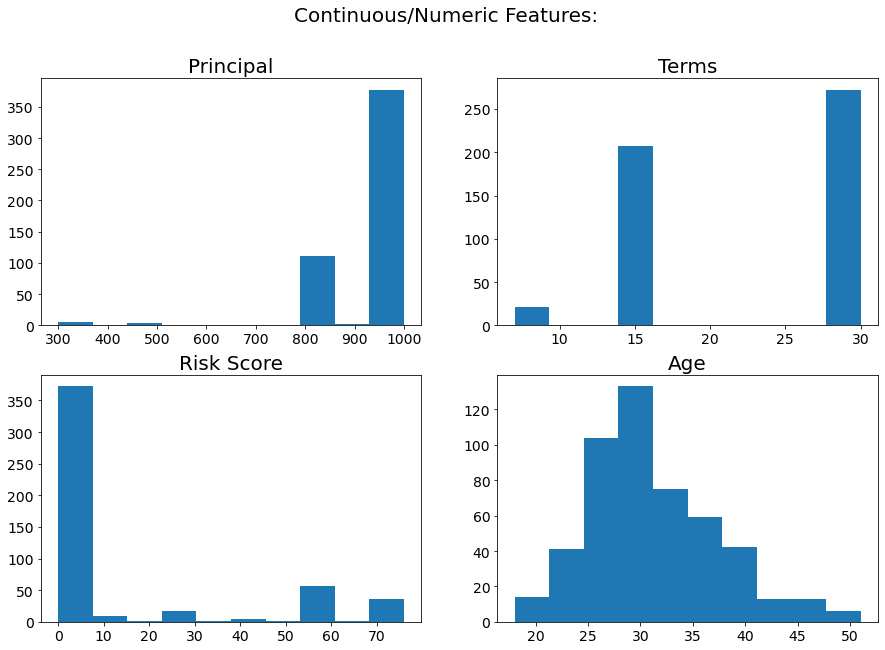

In [22]:
plt.figure(figsize=(15, 10))
plt.suptitle("Continuous/Numeric Features:", fontsize=20)

plt.subplot('221')
plt.hist(data['Principal'])
plt.title('Principal')
plt.subplot('222')
plt.hist(data['Terms'])
plt.title('Terms')
plt.subplot('221')
plt.subplot('223')
plt.hist(data['Risk Score'])
plt.title('Risk Score')
plt.subplot('224')
plt.hist(data['Age'])
plt.title('Age')
plt.show()


# your code here 


**Write-up!** Describe each plot. 

**Your response here:** Principal is mostly 1000, terms is mostly 15 or 30, risk score is mostly 0, and age looks pretty well distributed, leanng right, mean at 30 ish.


#### Multiple Varaibles: Gender and Education

Let's take a deeper look at the `Gender` and `Education` features.

**Try this!** In the following cell, use `education_by_gender` to create a barplot that shows bars for each gender _side-by-side_ for each education level. Such plots are called **grouped barplots** and we have an example in the [plotting cheatsheet](https://wustl.instructure.com/courses/76409/pages/matplotlib-cheatsheet?module_item_id=961380). 

<AxesSubplot:xlabel='Education', ylabel='counts'>

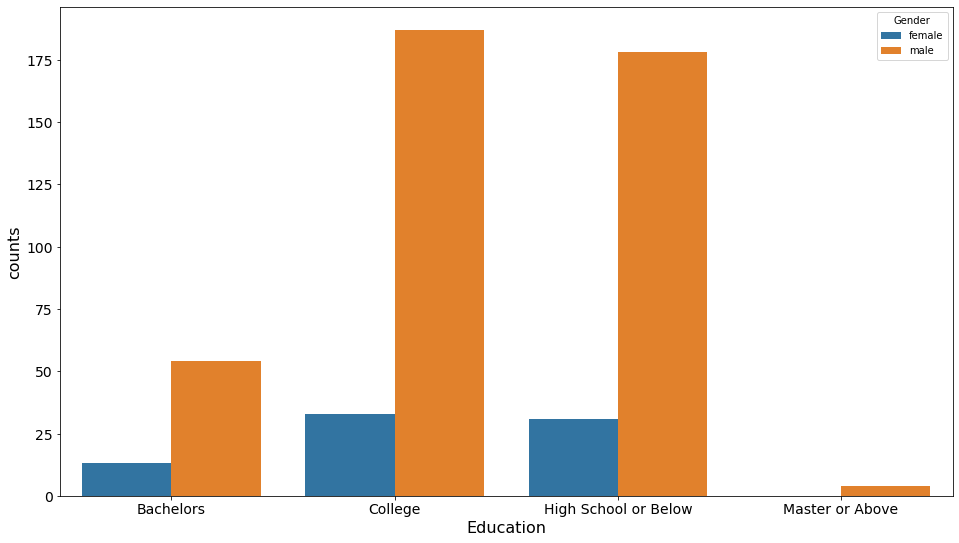

In [33]:
# group by gender and education and count the number of examples
# for each pair of feature values
education_by_gender = data[['Gender', 'Education', 'Status']] \
    .groupby(['Gender', 'Education'], as_index=False) \
    .aggregate('count')

# after aggregation, all columns other than the ones used to group will have
# the same values. here we included `Status` as a placeholder column which
# now holds counts, so should be renamed.
education_by_gender = education_by_gender.rename({'Status': 'counts'}, axis=1)


# your code here 
import seaborn as sns

sns.barplot(x = 'Education', hue = 'Gender', y = "counts", data = education_by_gender )

In [25]:
education_by_gender

,Gender,Education,counts
0,female,Bachelors,13
1,female,College,33
2,female,High School or Below,31
3,male,Bachelors,54
4,male,College,187
5,male,High School or Below,178
6,male,Master or Above,4


#### Multiple Varaibles: Gender and Status

**Try this!** In the following cell, use `loan_status_by_gender` to create a barplot that shows bars for each gender side-by-side for each education level.

<AxesSubplot:xlabel='Status', ylabel='counts'>

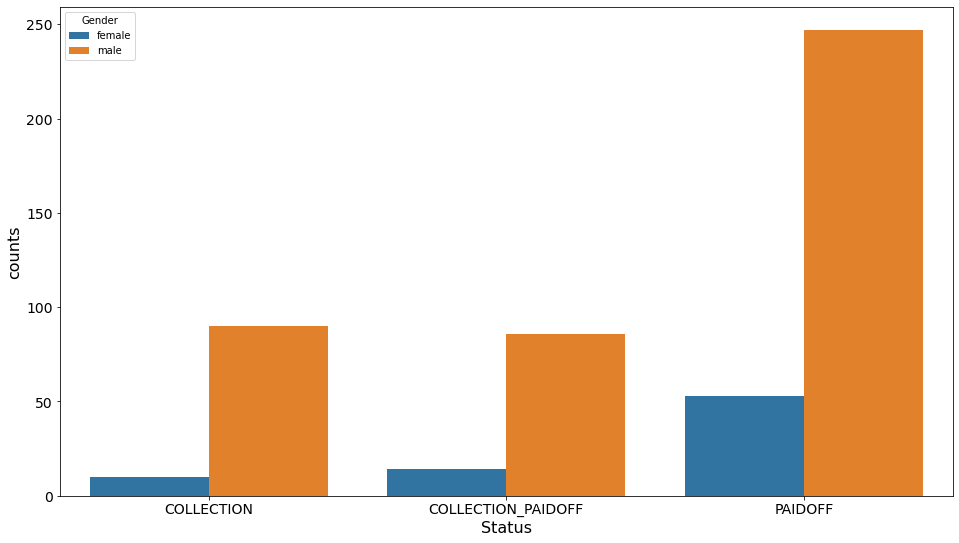

In [39]:
# group by gender and education and count the number of examples
# for each pair of feature values
loan_status_by_gender = data[['Gender', 'Education', 'Status']] \
    .groupby(['Gender', 'Status'], as_index=False) \
    .aggregate('count')

# after aggregation, all columns other than the ones used to group will have
# the same values. here we included `Education` as a placeholder column which
# now holds counts, so should be renamed.
loan_status_by_gender = loan_status_by_gender.rename({'Education': 'counts'}, axis=1)


# your code here 
sns.barplot(x = 'Status', hue = 'Gender', y = "counts", data = loan_status_by_gender )

In [38]:
loan_status_by_gender

,Gender,Status,counts
0,female,COLLECTION,10
1,female,COLLECTION_PAIDOFF,14
2,female,PAIDOFF,53
3,male,COLLECTION,90
4,male,COLLECTION_PAIDOFF,86
5,male,PAIDOFF,247


### Describe your Findings 

Before we go ahead and prepare our data for the ML model part, let's pause and describe our findings of our EDA (_exploratory data analysis_). 

**Write-up!** Begin with summarizing your dataset. After looking at your visulaizations from above, can you confirm your inital thoughts on the presence or absence of bias in the laon application scenario? Again, think about the different types of bias and carefully describe your findings.

**Your response here:** It seems that our data is biased by including gender as a variable.


## 3. Data Preprocessing

Now that we have a sense for the bias of our dataset, let's prepare our data for the machine learning workflow. We will need to select a traget variable and get appropriate numeric representations for all our categorical variables. 

<img src="utility/images/undraw_developer_activity_bv83.png" alt="analytics" style="width: 600px;"/>

### Encoding the Class Labels

Let's start with selecting a target: we wil use `Status` as the target, since its categories would correspond to whether we should approve someone's application (cf., `PAIDOFF`) or not (`COLLECTION`). 

Now, we will have to encod this categorical target with enumerations instead of the string values that it currently has. As a reminder, this is what our dataset looks like right now.

In [40]:
data.head()

,Status,Principal,Terms,Risk Score,Age,Education,Gender
0,PAIDOFF,1000,30,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bachelors,female
2,PAIDOFF,1000,30,0.0,33,Bachelors,female
3,PAIDOFF,1000,15,0.0,27,College,male
4,PAIDOFF,1000,30,0.0,28,College,female


#### Encoding the Categorical Target (Class Label)

An easy way to encode the categorical target variable `Status` is to use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) from `sklearn`. In the cell below, we create an instance of a `LabelEncoder` and use it to transform the categorical target. We use `fit_transform` to remember the encodings it used so that we can apply the same transformation to other data sets (for example a test set if we had already split our data set). 
> **Caution**: Class labels are always treated as _nominal_ variables, even though the class labels (which could be more than 2 differnt classes) are stored in a single column. This contrasts the teatment of features. Features where numerical categories such as 0,1,2,... are stored in _one_ column are treated as _ordinal_ features. For a true catgorical represenation as _nominal_ variable, we have to use the [**one-hot-encoding**](https://en.wikipedia.org/wiki/One-hot). 

In [42]:
from sklearn.preprocessing import LabelEncoder

target = 'Status'

# create the encoder
label_encoder = LabelEncoder()

# fit the encoder and transform the target variable
label_encoded = label_encoder.fit_transform(data[target])

### Encoding the Cateogrical Features

Now, we will need to encode our **categorical** (we treat those as _nominal_ - there is **no** order between the categories) and **ordinal** (there is an order) features with enumerations instead of the string values that they currently have.

**Try this!** Identify the nominal and ordinal feature(s) and store their column names in `categorical` and `ordinal` respectively.

In [46]:
# your code here 
categorical = 'Gender'
ordinal = 'Eductation'
# remember the columns of features that will not change their encoding
rest = data.columns.difference([categorical, ordinal, target])
rest

Index(['Age', 'Education', 'Principal', 'Risk Score', 'Terms'], dtype='object')

#### Encoding Categorical Features

An easy way to encode categorical features is to use the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) from `sklearn`. We follow the same steps as for the class label, but now we use the `OneHotEncoder`.

**Try this!** Encode the categorical variable whose column name you stored in `categorical` using the `OneHotEncoder`. You can use the code in the previous cell as inspiration. 
> **Hint**: One can always drop the first column in the one-hot transformation (`drop='first'`), since all the information is encoded by the combination of all remaining new features. Also, we do not want a sparse matrix returned, so set `sparse=False`. 

In [54]:
from sklearn.preprocessing import OneHotEncoder

# use those variable names
onehot_encoder = OneHotEncoder()
categorical_encoded = onehot_encoder.fit_transform(data[categorical].to_numpy().reshape(-1,1))

#### Encoding Ordinal Features

Likewise with the categorical features, we can use an [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) to perform our encodings for ordinal features. However, in this case, the order of the labels is determined by the context of the problem. We need to give this order to the encoder.

Note that the procedure for using the OrdinalEncoder is slightly different from the LabelEncoder in this case because we only have a single ordinal variable. However, the take away is that you want to apply the transformation to each observation for each feature.

**Try this!** Encode the ordinal variable whose column name you stored in `ordinal` using the `OrdinalEncoder`. You can use the code in the two previous cells as inspiration. 
> **Hint**: You will ahve to provide the order of the categories as `categories=[ordered_list]` when creating the  `OrdinalEncoder`. Come up with a reasonable order!

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# use those variable names
ordinal_encoder = ['']
ordinal_encoded = None

# your code here 


### Combining the Results

Now we can combine the encoded features with the numerical data from the original data frame to give us `X` and `y`. Rather than creating `numpy` arrays, we keep the `pandas` dataframes, so that we have easy access to our features via column names. 

In [ ]:
encoded_data1 = pd.DataFrame(categorical_encoded, columns=[categorical])
encoded_data2 = pd.DataFrame(ordinal_encoded, columns=[ordinal])

In [ ]:
X = pd.concat((data[rest], encoded_data1, encoded_data2), axis=1)
y = pd.Series(label_encoded, name='Status')

#### Verify the Data Integrity

Here is our original data for comparison:

In [ ]:
print(data.shape)
data.head()

**Try this!** Print the shapes of `X` and `y` and inspect the first couple of rows/entries in  both varaibles to make sure we have the correct data for building our model. 

> **Hint**: compare your results with `data`. You should further not have lost any entires nor columns ;-)  And the entires should be properly encoded: numeric variables should not have changed and categorical ones should now have the appropriate numeric labels (ordinal or one-hot). 

In [ ]:
# your code here 


**Sanity check**: You should have the same nubmer of rows in every variable and the number of columns in `X` should be one less than in `data`, since we singled out the target variable into `y`.  
> **Note**: if we would have transformed a non-binary categorical variable using the `OneHotEncoder` then the number of features would have increased by (number of categories - 1). 

#### Recover the Mappings
Notice how the categorical values like "PAIDOFF" have now been replaced with numbers. We can see which numbers map to each value using the `inverse_transform` of the respective encoder:

In [ ]:
labels = np.unique(y)
print(labels)
list(label_encoder.inverse_transform(labels))

In [ ]:
temp = np.unique(X['Gender'])
print(temp)
onehot_encoder.inverse_transform(temp.reshape(-1, 1))

In [ ]:
temp = np.unique(X['Education'])
print(temp)
list(ordinal_encoder.inverse_transform(temp.reshape(-1, 1)))

In [ ]:
y.unique()

#### Summary of Data avialbale for Machine Learning

**Write-up!** Finish up this part by describing the prediction task, summarizing the data set available for the machine learning process, and its variables `X` and `y` including their types.  

**Your response here:** 


That's all for today. We pick it up form here next week :-)

# Part II: The ML Model

## 4. Building a Model

Now that we have prepared our data set and let's build a baseline model and analyze it's performance. 

<img src="utility/images/undraw_predictive_analytics_kf9n.png" alt="analytics" style="width: 600px;"/>


As a reminder, read the last **write-up** cell with the data summary from the last session. 

**Try this!** Use the cell below to check for the **data type** of `X` and `y` and take a look at some of the data entries in both variables. Keep this in mind for some of the subsequqent tasks. 

In [ ]:
# your code here 


### Establishing a Baseline

First, let's create a train/test split of our data. Recall that we introduced and used _stratification_ in `hw5` for creating the trainng and test data using [`train_test_split` 🔗](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

**Try this!** Create a train/test split of `X` and `y` using a `test_size` of 20%, a `random_state` of 3, and with stratification by `y`. 

> **Recap** your visualizations/findings in Part I to verify why we need to use `stratify` for this prediction problem.

In [ ]:
from sklearn.model_selection import train_test_split


# your code here 


Then, let's train and evaluate a Logistic Regression model.

**Try this!** Create a `LogisticRegression` model with '_liblinear_' as the `solver`, `multi_class` set to '_auto_', and a `random_state` of 11. Then, train the model.

> **Note:** In this case, we have **three target classes** — you don't have to worry about how this works, but feel free to ask if you are curious.

In [ ]:
from sklearn.linear_model import LogisticRegression


# your code here 


**Try this!** In the cell below, evaluate the model's performance on the testing set.

In [ ]:
# your code here 


**Write-up!** How does our model perform on the test set?

**Your response here:** 


### Taking a Closer Look!

Let's also try looking at the model's performance on test examples of different genders.

**Try this!** In the following cell, create a mask (a boolean array) of `X_test` that has true values when the loan's applicant was a woman and false otherwise. Store this mask in `test_female_applicants`.

> **Hint**: Remember the data type of `X` and or check for the data type of `X_test` in the cell below.

In [ ]:
# your code here 


assert test_female_applicants.sum() == 18, 'There should be 18 true values in your mask'
assert str(type(test_female_applicants)) == "<class 'pandas.core.series.Series'>", 'test_female_applicants should be a series.'

Next, let's write a function that will automate our evaluation process.

In [ ]:
from textwrap import dedent


def evaluate(model, X_test, y_test, female_idx):
    '''
    Evaluates a MODEL on X_TEST, male examples in X_TEST, and female examples in X_TEST
    '''
    
    assert isinstance(X_test, (pd.DataFrame, np.ndarray)), \
        f'expected `X_test` to be a pd.DataFrame or an np.ndarray (got {type(X_test)})'

    assert female_idx is not None, \
        'Female index array required'

    score = model.score(X_test, y_test)
    mscore = model.score(X_test[~female_idx],
                         y_test[~female_idx])
    fscore = model.score(X_test[female_idx],
                         y_test[female_idx])
    
    print(dedent(f'''
    Test Set Performance -----
                  score: {score:0.3f}
                    men: {mscore:0.3f}
                  women: {fscore:0.3f}

    ''').strip())

evaluate(model, X_test, y_test, test_female_applicants)

**Write-up!** What do you notice about these scores? How do these compare with the initial score we saw for the entire test set? What does this imply about our model and your selected fairness criteria?

**Your response here:** 


Yikes!

## 5. Towards a Fair Algorithm

To move on we need to define what a _fair_ algorithm is and then identify a suitable definition of fairness to implement in our machine learning model. 

<img src="utility/images/undraw_shared_goals_3d12.png" alt="human" style="width: 600px;"/>


### Defining Fairness
It turns out that defining _fairness_ -- and in turn _unfairness_ -- is a challenging task and in fact by adhering to one definition of fairness you might violate another. But that doesn't mean we shouldn't try. Below are five definitions applied to our load approval scenario (taken from [here](https://towardsdatascience.com/bias-and-algorithmic-fairness-10f0805edc2b)).

> **Question:** Which one is *best*? Take a couple of minutes to read through and understand the different definitions. Then, discuss your choice(es) in your group!

#### <a name="GUS"></a>  Group Unaware Selection (also *Fairness though Blindness*)
We simply disregard the gender information in the application process. Because there is a limited number of possible approvals a lender can grant they go to the most qualified individual based on objective, gender neutral criteria. But removing gender and gender-proxy information does not address historic biases and is generally not a very efficient process to mitigate bias as we will see in the worked example on loan application data below.

#### Adjusted Group Thresholds 
Because historic biases make women appear less loan-worthy than men, e.g. work history and childcare responsibilities, we use different approval thresholds by group.

#### Demographic Parity
The approval rates should reflect the percentage of applications by group. But this would not take the risk of a default on a mortgage into account.

#### Equal Opportunity 
The same percentage of men and women who are loan-worthy are given mortgages. This seems to meet the business objective of a mortgage lender and seems to be fair. _"Individuals who qualify for a desirable outcome should have an equal chance of being correctly classified for this outcome."_ (Moritz Hardt)

#### Precision Parity
Not granting loans can have a very negative impact on an individual. In equal opportunity both groups have true positive parity. But if the model is wrong twice as often about women not paying back their loans (false negative) than the model would reject twice as many loan-worthy women than men. As such the model should be tuned so that the percentage of times the model is wrong in the total of approvals and denials is the same for both groups.

**Discussion!** Consider the following questions: 
- Which definition would you use?
- Does this choice violate other defintions/aspects of fairness?
- Is there a universal definition for “fairness”?
- What should we do when business requirements conflict with ethical requirements?
- If we can’t reconcile these requirements, should we just stop?

Discuss your choice(es) in your group or with your partner! This should take about 10min. 

**Write-up!** Record the discussion outcome and main thoughts (pros and cons).

**Your response here:** 



Identifying a suitable definition of fairness seems to be just a first step. Now, we need to select a suitable mitigation strategy for biases. Again, mitigating bias is a complex topic and there is, again, no universal approach or silver bullet. **But again, we have to give it a try!**

### Idea 1: Pre-processing

Let's look at some potential mitigation strategies that can be applied before the modeling step.

#### Dropping Gender — Group Unaware Selection
So our model is biased with respect to gender and gender is a feature of the model. Would it help to ignore the gender feature during training (cf. [*Group Unaware Selection*](#GUS))? Let's try it out.

Let's try repeating our procedure from our baseline experiment, but this time using all of the features except `gender` for training and testing.

**Try this!** In the following cell, create a list of all feature names excluding "Gender" and store it in `not_gender`.

In [ ]:
# your code here 


model = LogisticRegression(solver='liblinear', multi_class='auto', random_state=11)
model.fit(X_train[not_gender], y_train)

evaluate(model, X_test[not_gender], y_test, test_female_applicants)

**Write-up!** With your neighbor, discuss the results and what this might imply about our model and our data. Also, discuss why it may or may not be a good idea to ignore "protected variables" like "gender" when training a model. Consider how other features may have contributed this this outcome. Record your response below.

**Your response here:** 


#### Upsampling Minority

Another idea is to artificially rebalance the data set by upsampling the minority. In the following cell, we compute the Male to Female ratio in our data set — the approximate number of times we need to repeat the female applicant examples to achieve an approximately equal proportion of examples from each gender.

In [ ]:
import numpy as np

N_train_male, N_train_female = X_train['Gender'].value_counts()
number_of_repeats = int(N_train_male / N_train_female)

Then, we perform the upsampling for the training set.

In [ ]:
train_male_idx = X_train['Gender'] == 1
train_female_idx = X_train['Gender'] == 0

X_train_upsampled = pd.concat([
    X_train[train_male_idx],
    pd.concat([X_train[train_female_idx]] * number_of_repeats, ignore_index=True)
])

y_train_upsampled = pd.concat([
    y_train[train_male_idx],
    pd.concat([y_train[train_female_idx]] * number_of_repeats, ignore_index=True)
])

Now, let's re-train the model and look at the performance. 

In [ ]:
model = LogisticRegression(solver='liblinear', multi_class='auto', random_state=11)
model.fit(X_train_upsampled, y_train_upsampled)

evaluate(model, X_test, y_test, test_female_applicants)

Did this make a difference? What caveats can you come up for this strategy?

**Write-up!** With your neighbor, discuss these results and speculate about why they have occured. Record your response below.

**Your response here:** 


### Idea 2: Changing the Model

Next, let's consider some strategies related to model creation step.

#### Train Separate Models

What if we simply trained two different models, one for each gender? In the following cell, we create split our training set `X_train` into two separate data sets for each gender.

In [ ]:
train_male_idx = X_train['Gender'] == 1
train_female_idx = X_train['Gender'] == 0

X_train_male, y_train_male = X_train[train_male_idx], y_train[train_male_idx]
X_train_female, y_train_female = X_train[train_female_idx], y_train[train_female_idx]

Now, let's fit and evaluate a model trained on only male examples. We will evaluate it on the whole test set (both men and women).

In [ ]:
male_model = LogisticRegression(solver='liblinear', multi_class='auto', random_state=11)
male_model.fit(X_train_male, y_train_male)

evaluate(male_model, X_test, y_test, test_female_applicants)

**Write-up!** With your neighbor, discuss these results and speculate about why they have occured. Why did this model perform better for both men and women? Record your response below.

**Your response here:** 


In [ ]:
female_model = LogisticRegression(solver='liblinear', multi_class='auto', random_state=11)
female_model.fit(X_train_female, y_train_female)

evaluate(female_model, X_test, y_test, test_female_applicants)

**Write-up!** With your neighbor, discuss these results and speculate about why they have occured. Why did this model perform worse for both men and women? Record your response below.

**Your response here:** 


#### Complex Features

It's also plausible that a linear model is too simple to find a good fit for our data. In the following cell, we try to use a Polynomial model.

> **For those who are interested**: a polynomial is a linear combination of non-linear terms. This means that we can use a linear model to fit polynomials simply by transforming our features into polynomial features before fitting the model.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)

In [ ]:
poly_model = LogisticRegression(solver='liblinear', multi_class='auto', random_state=11)
poly_model.fit(X_train_poly, y_train)

evaluate(poly_model, poly.transform(X_test), y_test, test_female_applicants)

**Write-up!** With your neighbor, discuss these results. Briefly, what were some of the caveats we discussed about using more complex models? Is this 2nd degree polynomial (quadratic) model a good model? Record your response below.

**Your response here:** 


### Idea 3: Post-processing  
There are also some steps we can take after training a model. In the following example, we leverage the probabilitistic nature of Logistic regression to reason about the model's "confidence" in its predictions.

Here, we set a **confidence threshold** above which we will take the models predictions.

In [ ]:
threshold = 0.75

model = LogisticRegression(solver='liblinear', multi_class='auto', random_state=11)
model.fit(X_train, y_train)

# compute the class-label probabilities for each test example
probs = model.predict_proba(X_test)

# find the examples that can be predicted with probability greater than threshold
greater_than_threshold = np.any(probs > threshold, axis=1)

# only make predictions for those examples whose labels can be predicted with enough confidence
X_test_confident = X_test[greater_than_threshold]
#y_hat_confident = model.predict(X_test_confident)

print(f'Made predictions for {greater_than_threshold.mean():0.2%} of test applications.\n')
evaluate(model, X_test_confident, y_test[greater_than_threshold], test_female_applicants[greater_than_threshold])

So, this looks good. But what to do with the test cases that we didn't make predictions for?  

We will refer these cases for further -- _human_ -- evaluation, since our AI model was not sure about the prediction!

<img src="utility/images/undraw_Meeting_re_i53h.png" alt="human" style="width: 600px;"/>

Let's look at these cases and compare the would-be predictions and its proability values to the ground truth.

In [ ]:
X_test_not_confident = X_test[~greater_than_threshold]
y_test_not_confident = y_test[~greater_than_threshold]

not_confident = data.iloc[X_test_not_confident.index, :].copy()

enc_status = {enc: val for enc, val in zip(y.unique(),
                                           data['Status'].unique())}
not_confident['would-be prediction'] = list(map(lambda l: enc_status[l],
                                                  model.predict(X_test_not_confident)))

not_confident['p(would-be prediction)'] = probs[~greater_than_threshold].max(axis=1)
not_confident

**Write-up!** With your neighbor, discuss these results. Considering the problem and context, why might this be the best strategy out of the ones we have tried? Why not? Record your response below.

**Your response here:** 


Note that **all** of the above methods are **valid methods** to mitigate bias. For a specific application domain and dataset some will work while others don't. It is good to have all of them in your repertoire, when doing data science in the real-world!  

## 6. Becoming Data and Fairness Aware
 
<img src="utility/images/undraw_team_spirit_hrr4.png" alt="team" style="width: 600px;"/>

### Takeaways

The goal of today's lab was to demonstrate how an accuracy score can mislead you into thinking that your model is great and that your mission has been accomplished. By digging only a little bit deeper and evaluating our model's performance on each gender separately, we found that it performed very differently between genders. It was biased!

We ran into the same problem Amazon did with their resume reviewing algorithm. Because the data we used was imbalanced, we introduced bias into our model unintentionally.

If you search online, you will find a myriad of ways that could be used to mitigate the effects of an imbalanced dataset. However, at the end of the day, the **best solution for both Amazon and us is to collect more complete data**.

![takeaways](utility/images/takeaways.png)

### What comes next? 

We have only barely scratched the surface of fairness in Data Science. The field is both complex and emerging. If you are looking for more information about, I recommend starting with [Google's overview](https://developers.google.com/machine-learning/fairness-overview/) of the topic.

I hope that you will leave here today with a different, more careful perspective on your data and how it might unintentionally create bias in your models and in turn may cause harm to (some of) its users or stakeholders.

I will also leave you with this quote from [a report](https://www.nap.edu/read/25104/chapter/13) by the [National Academies of Science, Engineering, and Medicine](https://www.nationalacademies.org).

> ## The Data Science Oath
>
> I swear to fulfill, to the best of my ability and judgment, this covenant:
> 
> 
> I will respect the hard-won scientific gains of those data scientists in whose steps I walk and gladly share such knowledge as is mine with those who follow.
> 
> I will apply, for the benefit of society, all measures which are required, avoiding misrepresentations of data and analysis results.
>
> I will remember that there is art to data science as well as science and that consistency, candor, and compassion should outweigh the algorithm’s precision or the interventionist’s influence.
> 
> I will not be ashamed to say, “I know not,” nor will I fail to call in my colleagues when the skills of another are needed for solving a problem.
>
> I will respect the privacy of my data subjects, for their data are not disclosed to me that the world may know, so I will tread with care in matters of privacy and security. If it is given to me to do good with my analyses, all thanks. But it may also be within my power to do harm, and this responsibility must be faced with humbleness and awareness of my own limitations.
>
> I will remember that my data are not just numbers without meaning or context, but represent real people and situations, and that my work may lead to unintended societal consequences, such as inequality, poverty, and disparities due to algorithmic bias. My responsibility must consider potential consequences of my extraction of meaning from data and ensure my analyses help make better decisions.
>
> I will perform personalization where appropriate, but I will always look for a path to fair treatment and nondiscrimination.
>
> I will remember that I remain a member of society, with special obligations to all my fellow human beings, those who need help and those who don’t.
>
> If I do not violate this oath, may I enjoy vitality and virtuosity, respected for my contributions and remembered for my leadership thereafter. May I always act to preserve the finest traditions of my calling and may I long experience the joy of helping those who can benefit from my work.

**Write-up!** Type your names below to indicate that you have read the oath and will comply to it when performing data science in the real-world - let it be a future job as data scientist or in a student or research project. 

**Your response here:** 
